## Data camp
## Machine learning

In [2]:
# To conduct the KNN(k-nearest neighborhood)
from sklearn.neighbors import KNeighborsClassifier
#knn=KNeigborsClassifier(n_neighbors=6)
#knn.fit(x_data,y_data)


### k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.

Import KNeighborsClassifier from sklearn.neighbors.
Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
Fit the classifier to the data using the .fit() method.

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

## k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as df. This time, you will create the feature array X and target variable array y yourself.

Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
Instantiate a KNeighborsClassifier with 6 neighbors.
Fit the classifier to the data.
Predict the labels of the training data, X.
Predict the label of the new data point X_new.

In [ ]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
Create an array for the features using digits.data and an array for the target using digits.target.
Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
Create a k-NN classifier with 7 neighbors and fit it to the training data.
Compute and print the accuracy of the classifier's predictions using the .score() method.

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

## Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

Inside the for loop:
Setup a k-NN classifier with the number of neighbors equal to k.
Fit the classifier with k neighbors to the training data.
Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


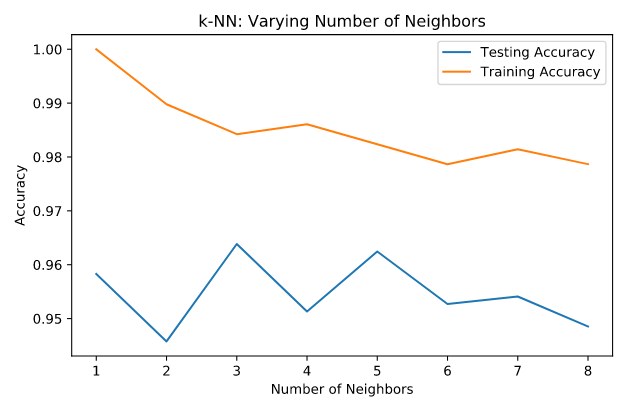

### Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

Import numpy and pandas as their standard aliases.
Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
Create array X for the 'fertility' feature and array y for the 'life' target variable.
Reshape the arrays by using the .reshape() method and passing in -1 and 1.

In [ ]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df =pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


In [ ]:
## correlation of variables of a data frame is obtained by df.corr()

### Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

Import LinearRegression from sklearn.linear_model.
Create a LinearRegression regressor called reg.
Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
Compute and print the R2 score using the .score() method.
Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility,y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


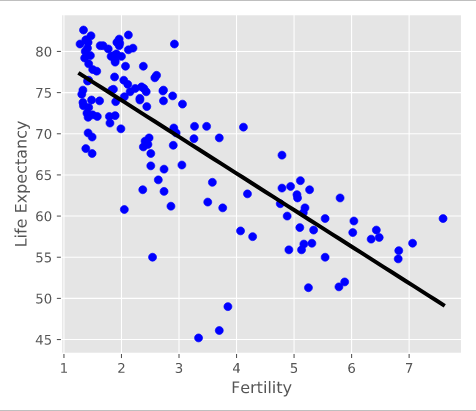

### Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
Compute and print the R2 score using the .score() method on the test set.
Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


In [ ]:
R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213

<script.py> output:
    R^2: 0.838046873142936
    Root Mean Squared Error: 3.2476010800377213


### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Create a linear regression regressor called reg.
Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

In [ ]:
# Import the necessary modules
from  sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores =cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


## K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Create a linear regression regressor called reg.
Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))


### Regularization I: Lasso
In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

Import Lasso from sklearn.linear_model.
Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
Fit the regressor to the data and compute the coefficients using the coef_ attribute.
Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


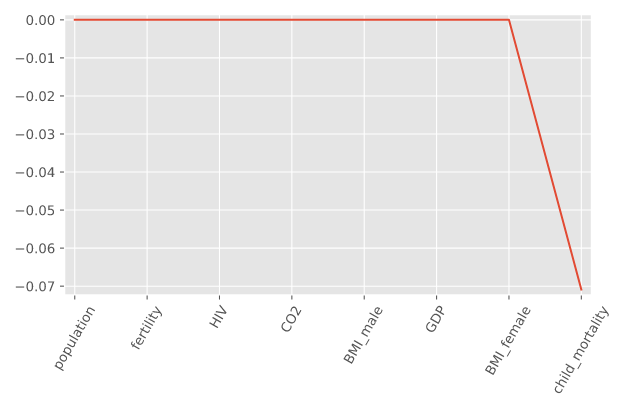

## Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

Instantiate a Ridge regressor and specify normalize=True.
Inside the for loop:
Specify the alpha value for the regressor to use.
Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
Use the display_plot() function to visualize the scores and standard deviations.

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


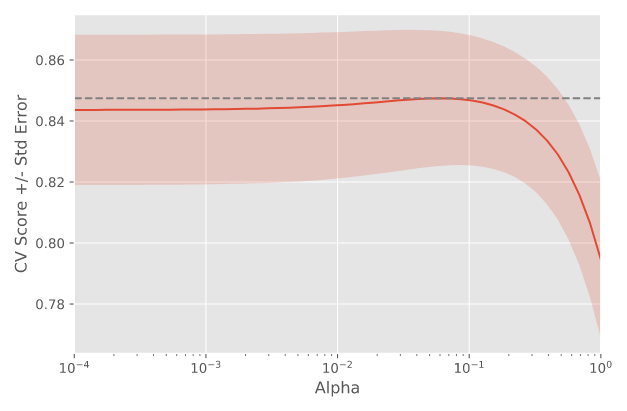

## Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame df and the feature and target variable arrays X and y have been created for you. In addition, sklearn.model_selection.train_test_split and sklearn.neighbors.KNeighborsClassifier have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

Import classification_report and confusion_matrix from sklearn.metrics.
Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

In [ ]:
# Import necessary modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Building a logistic regression model
Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays X and y have been pre-loaded, and train_test_split has been imported for you from sklearn.model_selection.

Import:
LogisticRegression from sklearn.linear_model.
confusion_matrix and classification_report from sklearn.metrics.
Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42. This has been done for you.
Instantiate a LogisticRegression classifier called logreg.
Fit the classifier to the training data and predict the labels of the test set.
Compute and print the confusion matrix and classification report. This has been done for you, so hit 'Submit Answer' to see how logistic regression compares to k-NN!

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Plotting an ROC curve
Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

Import roc_curve from sklearn.metrics.
Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

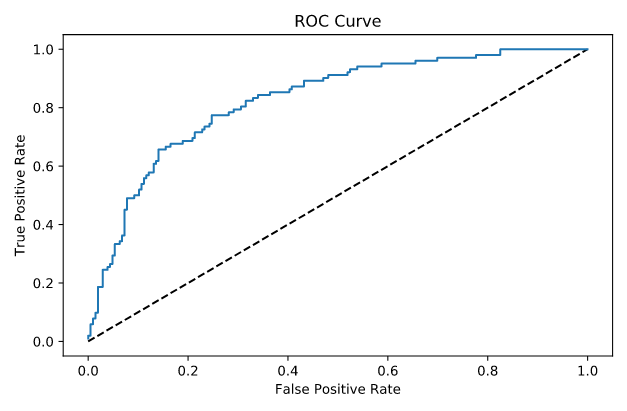

### AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

X and y, along with training and test sets X_train, X_test, y_train, y_test, have been pre-loaded for you, and a logistic regression classifier logreg has been fit to the training data.

Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc =cross_val_score(logreg,X,y,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

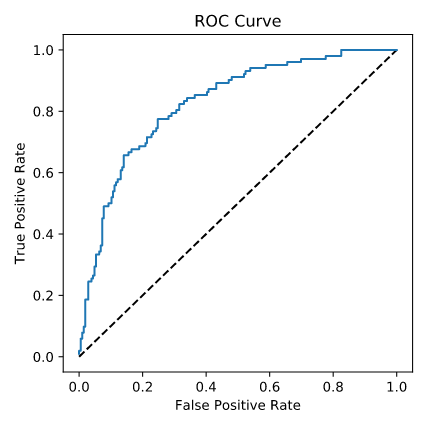

## Hyperparameter tuning with GridSearchCV
Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
Setup the hyperparameter grid by using c_space as the grid of values to tune C over.
Instantiate a logistic regression classifier called logreg.
Use GridSearchCV with 5-fold cross-validation to tune C:
Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

In [ ]:

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

# Instantiate a logistic regression classifier: logreg
logreg =LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the data
logreg_cv=logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
## solution
## Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
## Best score is 0.7708333333333334

### Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use RandomizedSearchCV to find the optimal hyperparameters. Go for it!

Import DecisionTreeClassifier from sklearn.tree and RandomizedSearchCV from sklearn.model_selection.
Specify the parameters and distributions to sample from. This has been done for you.
Instantiate a DecisionTreeClassifier.
Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
Print the best parameter and best score obtained from RandomizedSearchCV by accessing the best_params_ and best_score_ attributes of tree_cv

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree =DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

## Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2}
### Best score is 0.7395833333333334

### Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

Create the hyperparameter grid:
Use the array c_space as the grid of values for 'C'.
For 'penalty', specify a list consisting of 'l1' and 'l2'.
Instantiate a logistic regression classifier.
Create training and test sets. Use a test_size of 0.4 and random_state of 42. In practice, the test set here will function as the hold-out set.
Tune the hyperparameters on the training set using GridSearchCV with 5-folds. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.


In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv =GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

### Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
### Tuned Logistic Regression Accuracy: 0.7652173913043478



## Hold-out set in practice II: Regression
Import the following modules:
ElasticNet from sklearn.linear_model.
mean_squared_error from sklearn.metrics.
GridSearchCV and train_test_split from sklearn.model_selection.
Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
Specify the hyperparameter grid for 'l1_ratio' using l1_space as the grid of values to search over.
Instantiate the ElasticNet regressor.
Use GridSearchCV with 5-fold cross-validation to tune 'l1_ratio' on the training data X_train and y_train. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
Predict on the test set and compute the R2 and mean squared error.


In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net,param_grid , cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

#Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
#Tuned ElasticNet R squared: 0.8668305372460283
#Tuned ElasticNet MSE: 10.05791413339844


### Exploring categorical features
The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

### Import pandas as pd.
Read the CSV file 'gapminder.csv' into a DataFrame called df.
Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region'). To do so, pass the column names in to df.boxplot() (in that order).

In [ ]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

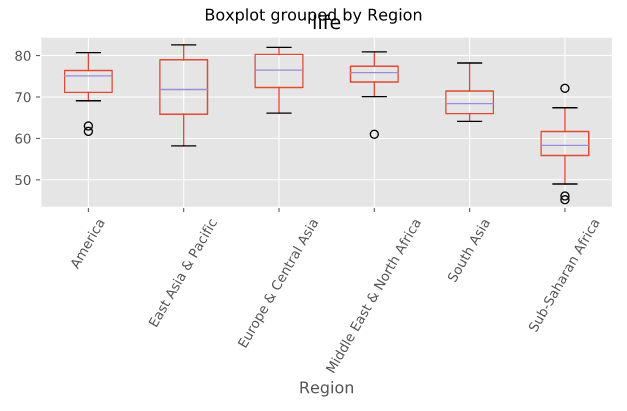

### Creating dummy variables
As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

Use the pandas get_dummies() function to create dummy variables from the df DataFrame. Store the result as df_region.
Print the columns of df_region. This has been done for you.
Use the get_dummies() function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').
Hit 'Submit Answer to print the new columns of df_region and take note of how one column was dropped!


In [ ]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


## Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.

Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
Perform 5-fold cross-validation on X and y using the cross_val_score() function.
Print the cross-validated scores.

In [ ]:
# Import necessary modules
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)
#[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]

## imputing missing data

In [ ]:
## first we have to check for the missing values by using df.info()
## we can replace the missing value by np.nan
imp=imputer(missing_value=np.nan,strategy='mean',axis=0) 
imp.fit(X)
X=imp.transform(X)## all the value of variable will be expressed in a similar scale


### Dropping missing data
The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

Explore the DataFrame df in the IPython Shell. Notice how the missing value is represented.
Convert all '?' data points to np.nan.
Count the total number of NaNs using the .isnull() and .sum() methods. This has been done for you.
Drop the rows with missing values from df using .dropna().
Hit 'Submit Answer' to see how many rows were lost by dropping the missing values.

In [ ]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


## Imputing missing data in a ML Pipeline I
As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. SVC stands for Support Vector Classification, which is a type of SVM.
Setup the Imputation transformer to impute missing data (represented as 'NaN') with the 'most_frequent' value in the column (axis=0).
Instantiate a SVC classifier. Store the result in clf.
Create the steps of the pipeline by creating a list of tuples:
The first tuple should consist of the imputation step, using imp.
The second should consist of the classifier.

In [ ]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

## Imputing missing data in a ML Pipeline II
Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively.

Import the following modules:
Imputer from sklearn.preprocessing and Pipeline from sklearn.pipeline.
SVC from sklearn.svm.
Create the pipeline using Pipeline() and steps.
Create training and test sets. Use 30% of the data for testing and a random state of 42.
Fit the pipeline to the training set and predict the labels of the test set.
Compute the classification report.

In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the train set
pipeline=pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report( y_test,y_pred))



### Centering and scaling your data
In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

### Import scale from sklearn.preprocessing.
Scale the features X using scale().
Print the mean and standard deviation of the unscaled features X, and then the scaled features X_scaled. Use the numpy functions np.mean() and np.std() to compute the mean and standard deviations.

In [ ]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

## solution
     ## Mean of Unscaled Features: 18.432687072460002
     ## Standard Deviation of Unscaled Features: 41.54494764094571
     ## Mean of Scaled Features: 2.7314972981668206e-15
     ## Standard Deviation of Scaled Features: 0.9999999999999999

### Centering and scaling in a pipeline
With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.

Import the following modules:
StandardScaler from sklearn.preprocessing.
Pipeline from sklearn.pipeline.
Complete the steps of the pipeline with StandardScaler() for 'scaler' and KNeighborsClassifier() for 'knn'.
Create the pipeline using Pipeline() and steps.
Create training and test sets, with 30% used for testing. Use a random state of 42.
Fit the pipeline to the training set.
Compute the accuracy scores of the scaled and unscaled models by using the .score() method inside the provided print() functions.

In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


### Bringing it all together I: Pipeline for classification
It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules and functions have been pre-loaded: Pipeline, SVC, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

Setup the pipeline with the following steps:
Scaling, called 'scaler' with StandardScaler().
Classification, called 'SVM' with SVC().
Specify the hyperparameter space using the following notation: 'step_name__parameter_name'. Here, the step_name is SVM, and the parameter_names are C and gamma.
Create training and test sets, with 20% of the data used for the test set. Use a random state of 21.
Instantiate GridSearchCV with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
Predict the labels of the test set and compute the metrics. The metrics have been computed for you.

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred =cv.predict(X_test) 

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


## Bringing it all together II: Pipeline for regression
For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.

Set up a pipeline with the following steps:
'imputation', which uses the Imputer() transformer and the 'mean' strategy to impute missing data ('NaN') using the mean of the column.
'scaler', which scales the features using StandardScaler().
'elasticnet', which instantiates an ElasticNet() regressor.
Specify the hyperparameter space for the l1 ratio using the following notation: 'step_name__parameter_name'. Here, the step_name is elasticnet, and the parameter_name is l1_ratio.
Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
Instantiate GridSearchCV with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
Fit the GridSearchCV object to the training set.
Compute R2 and the best parameters. This has been done for you, so hit 'Submit Answer' to see the results!

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
## solution
##Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
##Tuned ElasticNet R squared: 0.8862016570888217

## SQL

To select distinict columns we can use DISTINCT

In [ ]:
select DISTINCT language 
from films;

In [ ]:
## count the number of rows
select count(*)
from films

It's also common to combine COUNT with DISTINCT to count the number of distinct values in a column.

In [ ]:
select * 
from films
where release_year = 2016;

In [ ]:
### Get the title and release year for films released in the 90s.
select title,release_year
from films
where release_year >=1990
      and release_year<2000;

In [ ]:
#Now, build on your query to filter the records to only include French or Spanish language films.
select * 
from films
where language='French' 
      or  language='Spanish';

In [ ]:
SELECT title
FROM films
WHERE release_year >= 1994
AND release_year <= 2000;

In [ ]:
## the above gives the same as this one
SELECT title
FROM films
WHERE release_year >= 1994
AND release_year <= 2000;

In [ ]:
select title,release_year
from films
where (release_year =1990 or release_year =2000)
  and duration > 120

In [ ]:
select title,release_year
from films
where release_year  IN (1990,2000)
  and duration > 120

In [ ]:
## this is used to select those people name who have a missing name
#Null represent for missing observation
select name
from people
where deathdate is NULL

In [ ]:
#Get the title of every film which doesn't have a budget associated with it.
select title
from films
where budget is Null

LIKE and NOT LIKE
As you've seen, the WHERE clause can be used to filter text data. However, so far you've only been able to filter by specifying the exact text you're interested in. In the real world, often you'll want to search for a pattern rather than a specific text string.

In SQL, the LIKE operator can be used in a WHERE clause to search for a pattern in a column. To accomplish this, you use something called a wildcard as a placeholder for some other values. There are two wildcards you can use with LIKE:

The % wildcard will match zero, one, or many characters in text. For example, the following query matches companies like 'Data', 'DataC' 'DataCamp', 'DataMind', and so on:

In [ ]:
SELECT name
FROM companies
WHERE name LIKE 'Data%';

The _ wildcard will match a single character. For example, the following query matches companies like 'DataCamp', 'DataComp', and so on:

In [ ]:
SELECT name
FROM companies
WHERE name LIKE 'DataC_mp';

You can also use the NOT LIKE operator to find records that don't match the pattern you specify.

Got it? Let's practice!

In [ ]:
#Get the names of people whose names have 'r' as the second letter. The pattern you need is '_r%'
select name
from people
 where name like '_r%';

In [ ]:
## Get the names of people whose names don't start with A. The pattern you need is 'A%'.
select name
from people
 where name not like 'A%';

### Aggregate functions
Often, you will want to perform some calculation on the data in a database. SQL provides a few functions, called aggregate functions, to help you out with this.

For example,

      SELECT AVG(budget)
         FROM films;
gives you the average value from the budget column of the films table. Similarly, the MAX function returns the highest budget:

         SELECT MAX(budget)
             FROM films;
The SUM function returns the result of adding up the numeric values in a column:

           SELECT SUM(budget)
            FROM films;
You can probably guess what the MIN function does! Now it's your turn to try out some SQL functions.

In [ ]:
## Use the SUM function to get the total duration of all films.
select sum(duration)
from films;

In [ ]:
## Get the average duration of all films.
select avg(duration)
from films;

In [ ]:
#Get the duration of the shortest film.
select min(duration)
from films;
#Get the duration of the longest film.
select max(duration)
from films;

#### Combining aggregate functions with WHERE
Aggregate functions can be combined with the WHERE clause to gain further insights from your data.

For example, to get the total budget of movies made in the year 2010 or later:

             SELECT SUM(budget)
                FROM films
                WHERE release_year >= 2010;
                Now it's your turn!

In [ ]:
##Get the amount grossed by the best performing film between 2000 and 2012, inclusive.
select max(gross)
from films
where release_year between 2000 and 2012

A note on arithmetic
In addition to using aggregate functions, you can perform basic arithmetic with symbols like +, -, *, and /.

So, for example, this gives a result of 12:

          SELECT (4 * 3);
However, the following gives a result of 1:

         SELECT (4 / 3);
What's going on here?

SQL assumes that if you divide an integer by an integer, you want to get an integer back. So be careful when dividing!

If you want more precision when dividing, you can add decimal places to your numbers. For example,

        SELECT (4.0 / 3.0) AS result;
gives you the result you would expect: 1.333.

### It's AS simple AS aliasing
You may have noticed in the first exercise of this chapter that the column name of your result was just the name of the function you used. For example,

     SELECT MAX(budget)
        FROM films;
gives you a result with one column, named max. But what if you use two functions like this?

     SELECT MAX(budget), MAX(duration)
         FROM films;
Well, then you'd have two columns named max, which isn't very useful!

To avoid situations like this, SQL allows you to do something called aliasing. Aliasing simply means you assign a temporary name to something. To alias, you use the AS keyword, which you've already seen earlier in this course.

For example, in the above example we could use aliases to make the result clearer:

        SELECT MAX(budget) AS max_budget,
              MAX(duration) AS max_duration
              FROM films;
Aliases are helpful for making results more readable!

In [ ]:
#Get the title and net profit (the amount a film grossed, minus its budget) for all films. 
#Alias the net profit as net_profit.
select title, gross-budget as net_profit
from films;

In [ ]:
## Get the title and duration in hours for all films. The duration is in minutes, so you'll need
#to divide by 60.0 to get the duration in hours. Alias the duration in hours as duration_hours.
select title, duration/60.0 as duration_hours
from films;
## Get the average duration in hours for all films, aliased as avg_duration_hours.
select avg(duration/60.0) as avg_duration_hours
from films;

### Even more aliasing
Let's practice your newfound aliasing skills some more before moving on!

Recall: SQL assumes that if you divide an integer by an integer, you want to get an integer back.

This means that the following will erroneously result in 400.0:

       SELECT 45 / 10 * 100.0;
This is because 45 / 10 evaluates to an integer (4), and not a decimal number like we would expect.

So when you're dividing make sure at least one of your numbers has a decimal place:

      SELECT 45 * 100.0 / 10;
The above now gives the correct answer of 450.0 since the numerator (45 * 100.0) of the division is now a decimal!

In [ ]:
## Get the percentage of people who are no longer alive. Alias the result as percentage_dead. 
#Remember to use 100.0 and not 100!
select (count(deathdate)*100.0/count(*)) as percentage_dead
from people
## Get the number of years between the newest film and oldest film. Alias the result as difference.

In [ ]:
## Get the number of decades the films table covers. Alias the result as number_of_decades.
##The top half of your fraction should be enclosed in parentheses.
select (max(release_year)-min(release_year))/10 as number_of_decades
from films
where release_year is not NULL;

### ORDER BY
Congratulations on making it this far! You now know how to select and filter your results.

In this chapter you'll learn how to sort and group your results to gain further insight. Let's go!

In SQL, the ORDER BY keyword is used to sort results in ascending or descending order according to the values of one or more columns.

By default ORDER BY will sort in ascending order. If you want to sort the results in descending order, you can use the DESC keyword. For example,

        SELECT title
          FROM films
          ORDER BY release_year DESC;
gives you the titles of films sorted by release year, from newest to oldest.

How do you think ORDER BY sorts a column of text values by default?

In [ ]:
#Get the names of people from the people table, sorted alphabetically.
select name
from people
order by name;

In [ ]:
#Get the names of people, sorted by birth date.
select name
from people
order by birthdate;

In [ ]:
#Get the birth date and name for every person, in order of when they were born.
select birthdate,name
from people
order by birthdate;

In [ ]:
#Get the title of films released in 2000 or 2012, in the order they were released.
select title
from films
where release_year in (2000,2012)
order by release_year;

In [ ]:
#Get all details for all films except those released in 2015 and order them by duration.
select *
from films
where release_year<>2015
order by duration;

In [ ]:
#Get the title and gross earnings for movies which begin with the letter 'M' and order the results alphabetically.
select title,gross
from films
where title like  'M%'# this M should be in a single coat not in a double coat
order by title;


Sorting single columns (DESC)
To order results in descending order, you can put the keyword DESC after your ORDER BY. For example, to get all the names in the people table, in reverse alphabetical order:

         SELECT name
         FROM people
         ORDER BY name DESC;
Now practice using ORDER BY with DESC to sort single columns in descending order!

### Sorting multiple columns
ORDER BY can also be used to sort on multiple columns. It will sort by the first column specified, then sort by the next, then the next, and so on. For example,

      SELECT birthdate, name
       FROM people
       ORDER BY birthdate, name;
sorts on birth dates first (oldest to newest) and then sorts on the names in alphabetical order. The order of columns is important!

Try using ORDER BY to sort multiple columns! Remember, to specify multiple columns you separate the column names with a comma.

## GROUP BY
Now you know how to sort results! Often you'll need to aggregate results. For example, you might want to count the number of male and female employees in your company. Here, what you want is to group all the males together and count them, and group all the females together and count them. In SQL, GROUP BY allows you to group a result by one or more columns, like so:

     SELECT sex, count(*)
      FROM employees
      GROUP BY sex;
This might give, for example:
sex	   count
male	15
female	19
Commonly, GROUP BY is used with aggregate functions like COUNT() or MAX(). Note that GROUP BY always goes after the FROM clause!

### GROUP BY practice
As you've just seen, combining aggregate functions with GROUP BY can yield some powerful results!

A word of warning: SQL will return an error if you try to SELECT a field that is not in your GROUP BY clause without using it to calculate some kind of value about the entire group.

Note that you can combine GROUP BY with ORDER BY to group your results, calculate something about them, and then order your results. For example,

      SELECT sex, count(*)
      FROM employees
      GROUP BY sex
      ORDER BY count DESC;
because there are more females at our company than males. Note also that ORDER BY always goes after GROUP BY. Let's try some exercises!

In [ ]:
##Get the release year and count of films released in each year.
select release_year,count(*)
from films
group by release_year;

In [ ]:
## Get the release year and largest budget for all films, grouped by release year.
select release_year,max(budget)
from films
group by release_year;

In [ ]:
## Get the IMDB score and count of film reviews grouped by IMDB score in the reviews table.
select imdb_score,count(*)
from reviews
group by imdb_score;

### GROUP BY practice (2)
Now practice your new skills by combining GROUP BY and ORDER BY with some more aggregate functions!

Make sure to always put the ORDER BY clause at the end of your query. You can't sort values that you haven't calculated yet!

In [ ]:
## Get the release year and lowest gross earnings per release year.
select release_year,min(gross)
from films
group by release_year;

In [ ]:
#Get the release year, country, and highest budget spent making a film for each year, for each country.
#Sort your results by release year and country.
select release_year,country,max(budget)
from films
group by release_year,country
order by release_year, country;

In [ ]:
## Get the country, release year, and lowest amount grossed per release year per country. Order your 
#results by country and release year.
select country,release_year,min(gross)
from films
group by release_year,country
order by country,release_year;

## HAVING a great time
In SQL, aggregate functions can't be used in WHERE clauses. For example, the following query is invalid:

     SELECT release_year
      FROM films
      GROUP BY release_year
       WHERE COUNT(title) > 10;
This means that if you want to filter based on the result of an aggregate function, you need another way! That's where the HAVING clause comes in. For example,

      SELECT release_year
       FROM films
       GROUP BY release_year
       HAVING COUNT(title) > 10;
shows only those years in which more than 10 films were released.

In [ ]:
##In how many different years were more than 200 movies released?
SELECT release_year
FROM films
GROUP BY release_year
WHERE COUNT(title) > 200;

## All together now
Time to practice using ORDER BY, GROUP BY and HAVING together.

Now you're going to write a query that returns the average budget and average gross earnings for films in each year after 1990, if the average budget is greater than $60 million.

This is going to be a big query, but you can handle it!

In [ ]:
## Modify your query so that only years with an average budget of greater than $60 million are included.
select release_year,avg(budget) as avg_budget,avg(gross) as avg_gross
from films
where release_year>1990
group by release_year
having avg(budget) >60000000;## here we have to refer the function it self not the alias one
#Finally, modify your query to order the results from highest average gross earnings to lowest.
select release_year,avg(budget) as avg_budget,avg(gross) as avg_gross
from films
where release_year>1990
group by release_year
having avg(budget) >60000000
order by avg_gross desc;

### All together now (2)
Great work! Now try another large query. This time, all in one go!

Remember, if you only want to return a certain number of results, you can use the LIMIT keyword to limit the number of rows returned

In [ ]:
#Get the country, average budget, and average gross take of countries that have made more than 10 films. 
#Order the result by country name, and limit the number of results displayed to 5. You should alias the 
#averages as avg_budget and avg_gross respectively.
#select country, average budget, average gross
select country,avg(budget) as avg_budget,avg(gross) as avg_gross
#from the films table
from films
# group by country 
group by country
#where the country has more than 10 titles
having count(title)>10
#order by country
order by country limit 5;
#limit to only show 5 results


### A taste of things to come
Congrats on making it to the end of the course! By now you should have a good understanding of the basics of SQL.

There's one more concept we're going to introduce. You may have noticed that all your results so far have been from just one table, e.g. films or people.

In the real world however, you will often want to query multiple tables. For example, what if you want to see the IMDB score for a particular movie?

In this case, you'd want to get the ID of the movie from the films table and then use it to get IMDB information from the reviews table. In SQL, this concept is known as a join, and a basic join is shown in the editor to the right.

The query in the editor gets the IMDB score for the film To Kill a Mockingbird! Cool right?

As you can see, joins are incredibly useful and important to understand for anyone using SQL.

We have a whole follow-up course dedicated to them called Joining Data in PostgreSQL for you to hone your database skills further!

## Unsporvised sampling

### How many clusters?
You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

matplotlib.pyplot has already been imported as plt. In the IPython Shell:

Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
Make a scatter plot by passing xs and ys to the plt.scatter() function.
Call the plt.show() function to show your plot.
How many clusters do you see?

## Clustering 2D points
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

Import KMeans from sklearn.cluster.
Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
Use the .fit() method of model to fit the model to the array of points points.
Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.
Hit 'Submit Answer' to see the cluster labels of new_points.

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

### Inspect your clustering
Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

Import matplotlib.pyplot as plt.
Assign column 0 of new_points to xs, and column 1 of new_points to ys.
Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()


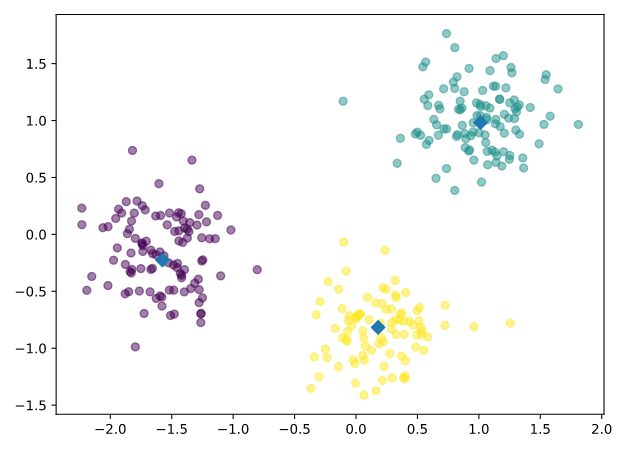

In [ ]:
## easily a cross tab can be obtained by

ct=pd.crosstab(df['species'],df['labels'])


## inertia measures the quality of clustering
                    --measures how is the spread of the element of the cluster. The smaller one is the better one
                    --uses the  distance from each element of the cluster to the centroid of the cluster
                    --KMeans minimizes inertia while choosing the cluster it belong to it

In [ ]:
  ## To use the k-means
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(samples)
model.inertia_## to get the inertia of the model. the smaller is the better one

    
    

### How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository.

For each of the given values of k, perform the following steps:
Create a KMeans instance called model with k clusters.
Fit the model to the grain data samples.
Append the value of the inertia_ attribute of model to the list inertias.
The code to plot ks vs inertias has been written for you, so hit 'Submit Answer' to see the plot!

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


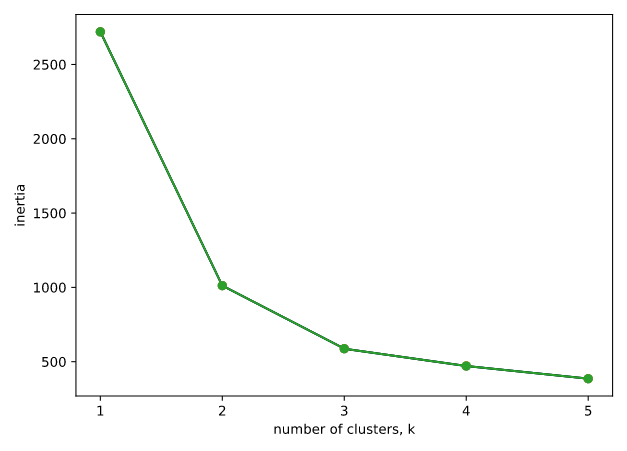

### Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

Create a KMeans model called model with 3 clusters.
Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
Hit 'Submit Answer' to see the cross-tabulation!

## Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

Create a KMeans model called model with 3 clusters.
Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
Hit 'Submit Answer' to see the cross-tabulation!

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)
model.fit(samples)
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


## Scaling fish data for clustering
You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

Import:
make_pipeline from sklearn.pipeline.
StandardScaler from sklearn.preprocessing.
KMeans from sklearn.cluster.
Create an instance of StandardScaler called scaler.
Create an instance of KMeans with 4 clusters called kmeans.
Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().

In [ ]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline =make_pipeline(scaler,kmeans)

### Clustering the fish data
You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species.

Import pandas as pd.
Fit the pipeline to the fish measurements samples.
Obtain the cluster labels for samples by using the .predict() method of pipeline.
Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.
Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

### Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

Import Normalizer from sklearn.preprocessing.
Create an instance of Normalizer called normalizer.
Create an instance of KMeans called kmeans with 10 clusters.
Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
Fit the pipeline to the movements array.

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

### Which stocks move together?
In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

Import pandas as pd.
Use the .predict() method of the pipeline to predict the labels for movements.
Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns. This has been done for you.
Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result.
Hit 'Submit Answer' and take a moment to see which companies are together in each cluster!

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels =pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels',ascending=True))

### Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

Import:
linkage and dendrogram from scipy.cluster.hierarchy.
matplotlib.pyplot as plt.
Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to mergings.
Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


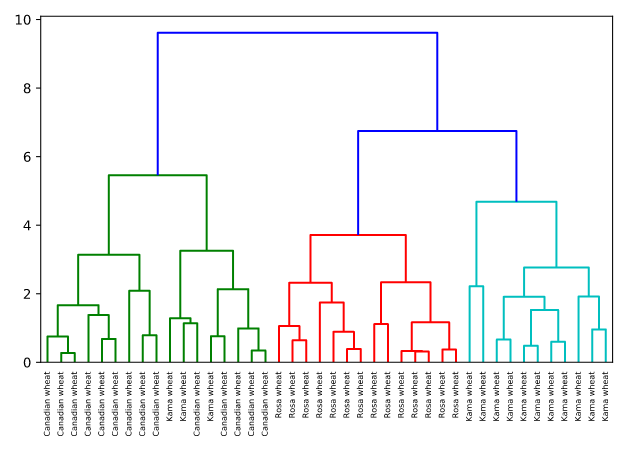

## Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

Import normalize from sklearn.preprocessing.
Rescale the price movements for each stock by using the normalize() function on movements.
Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.
Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

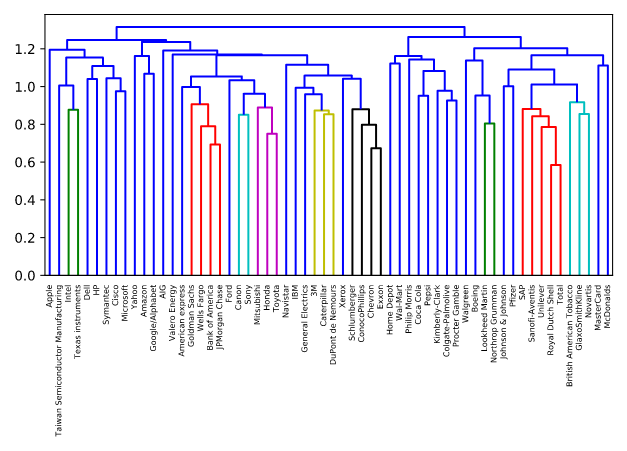

### Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

Import:
linkage and dendrogram from scipy.cluster.hierarchy.
matplotlib.pyplot as plt.
Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

### Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

Import:
linkage and dendrogram from scipy.cluster.hierarchy.
matplotlib.pyplot as plt.
Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram
dendrogram(mergings,labels=country_names,leaf_rotation=90,leaf_font_size=6)
plt.show()

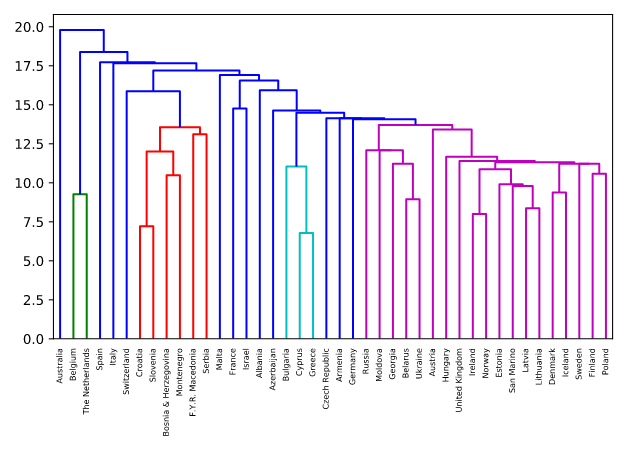

## Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

Import:
pandas as pd.
fcluster from scipy.cluster.hierarchy.
Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

In [ ]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


### t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

Import TSNE from sklearn.manifold.
Create a TSNE instance called model with learning_rate=200.
Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.
Select the column 0 of tsne_features. Assign the result to xs.
Select the column 1 of tsne_features. Assign the result to ys.
Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model =TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

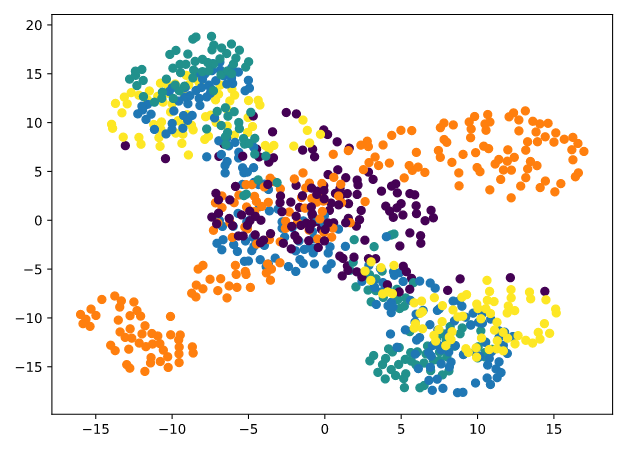

## A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

Import TSNE from sklearn.manifold.
Create a TSNE instance called model with learning_rate=50.
Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.
Select column 0 and column 1 of tsne_features.
Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.
Code to label each point with its company name has been written for you using plt.annotate(), so just hit 'Submit Answer' to see the visualization!

## A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

Import TSNE from sklearn.manifold.
Create a TSNE instance called model with learning_rate=50.
Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.
Select column 0 and column 1 of tsne_features.
Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.
Code to label each point with its company name has been written for you using plt.annotate(), so just hit 'Submit Answer' to see the visualization!


In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]
ys=tsne_features[:,1]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

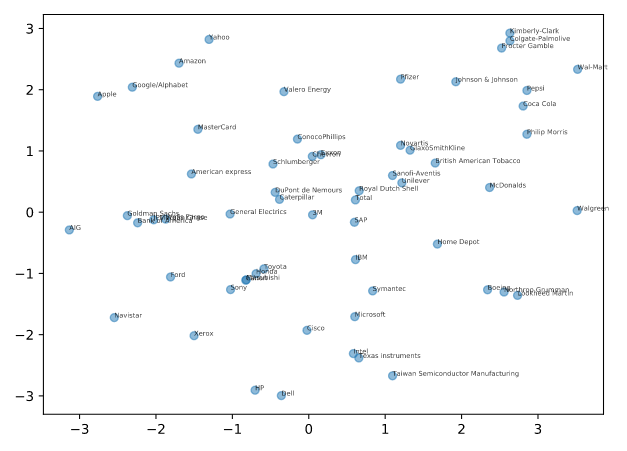

## Principal Components(PCA)

### Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

Import:
matplotlib.pyplot as plt.
pearsonr from scipy.stats.
Assign column 0 of grains to width and column 1 of grains to length.
Make a scatter plot with width on the x-axis and length on the y-axis.
Use the pearsonr() function to calculate the Pearson correlation of width and length.

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats  import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


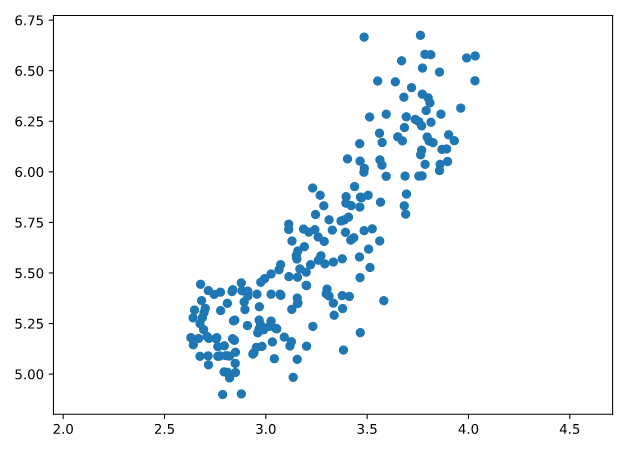

## Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

Import PCA from sklearn.decomposition.
Create an instance of PCA called model.
Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.
The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns pca_features has been written for you, so hit 'Submit Answer' to see the result!

### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

Import PCA from sklearn.decomposition.
Create an instance of PCA called model.
Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.
The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns pca_features has been written for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features =model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)
print(pvalue)
###2.5478751053409354e-17
####0.999999999999971

### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

Make a scatter plot of the grain measurements. This has been done for you.
Create a PCA instance called model.
Fit the model to the grains data.
Extract the coordinates of the mean of the data using the .mean_ attribute of model.
Get the first principal component of model using the .components_[0,:] attribute.
Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean =model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

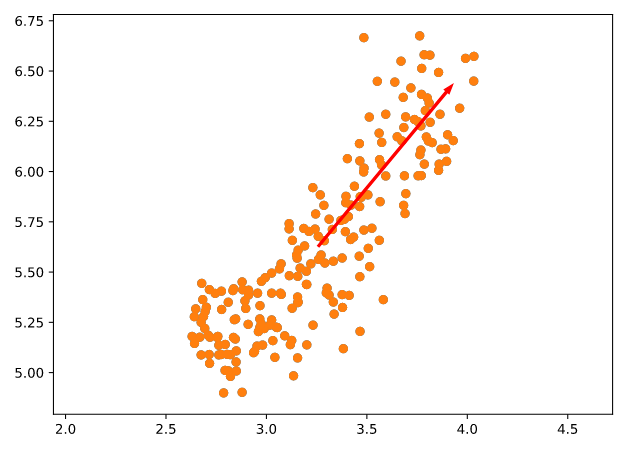

### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

Create an instance of StandardScaler called scaler.
Create a PCA instance called pca.
Use the make_pipeline() function to create a pipeline chaining scaler and pca.
Use the .fit() method of pipeline to fit it to the fish samples samples.
Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.


In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

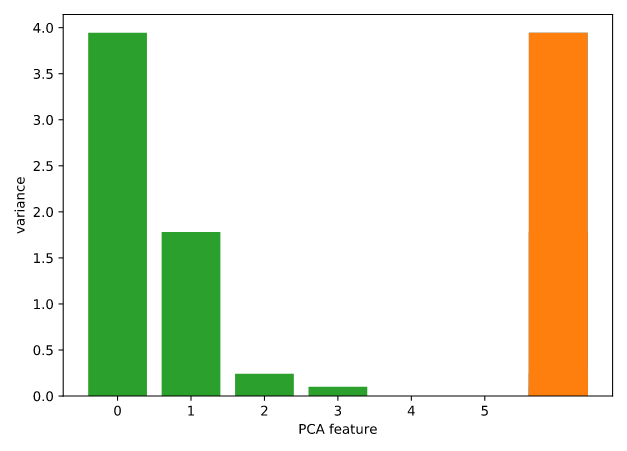

### Intrinsic dimension of the fish data
In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.======> answ:2

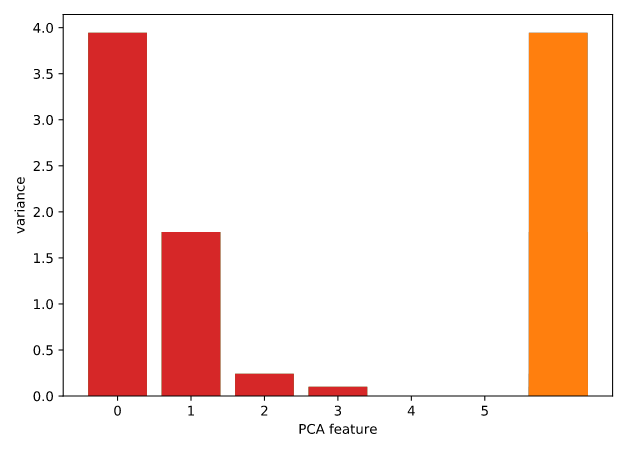

### Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

Import PCA from sklearn.decomposition.
Create a PCA instance called pca with n_components=2.
Use the .fit() method of pca to fit it to the scaled fish measurements scaled_samples.
Use the .transform() method of pca to transform the scaled_samples. Assign the result to pca_features.

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features =pca.transform(scaled_samples)

# Print the shape of pca_features
pca_features.shape

### A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

Import TfidfVectorizer from sklearn.feature_extraction.text.
Create a TfidfVectorizer instance called tfidf.
Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.
The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()
# Print words
print(words)

### Clustering Wikipedia part I
You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from here.

Import:
TruncatedSVD from sklearn.decomposition.
KMeans from sklearn.cluster.
make_pipeline from sklearn.pipeline.
Create a TruncatedSVD instance called svd with n_components=50.
Create a KMeans instance called kmeans with n_clusters=6.
Create a pipeline called pipeline consisting of svd and kmeans.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline =make_pipeline(svd,kmeans)

### Clustering Wikipedia part II
It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

Import pandas as pd.
Fit the pipeline to the word-frequency array articles.
Predict the cluster labels.
Align the cluster labels with the list titles of article titles by creating a DataFrame df with labels and titles as columns. This has been done for you.
Use the .sort_values() method of df to sort the DataFrame by the 'label' column, and print the result.
Hit 'Submit Answer' and take a moment to investigate your amazing clustering of Wikipedia pages!


In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


### NMF applied to Wikipedia articles
In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

Import NMF from sklearn.decomposition.
Create an NMF instance called model with 6 components.
Fit the model to the word count data articles.
Use the .transform() method of model to transform articles, and assign the result to nmf_features.
Print nmf_features to get a first idea what it looks like.

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

### NMF features of the Wikipedia articles
Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

Import pandas as pd.
Create a DataFrame df from nmf_features using pd.DataFrame(). Set the index to titles using index=titles.
Use the .loc[] accessor of df to select the row with title 'Anne Hathaway', and print the result. These are the NMF features for the article about the actress Anne Hathaway.
Repeat the last step for 'Denzel Washington' (another actor).

In [ ]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

### NMF learns topics of documents
In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

Import pandas as pd.
Create a DataFrame components_df from model.components_, setting columns=words so that columns are labeled by the words.
Print components_df.shape to check the dimensions of the DataFrame.
Use the .iloc[] accessor on the DataFrame components_df to select row 3. Assign the result to component.
Call the .nlargest() method of component, and print the result. This gives the five words with the highest values for that component.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

### Explore the LED digits dataset
In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

Import matplotlib.pyplot as plt.
Select row 0 of samples and assign the result to digit. For example, to select column 2 of an array a, you could use a[:,2]. Remember that since samples is a NumPy array, you can't use the .loc[] or iloc[] accessors to select specific rows or columns.
Print digit. This has been done for you. Notice that it is a 1D array of 0s and 1s.
Use the .reshape() method of digit to get a 2D array with shape (13, 8). Assign the result to bitmap.
Print bitmap, and notice that the 1s show the digit 7!
Use the plt.imshow() function to display bitmap as an image.

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


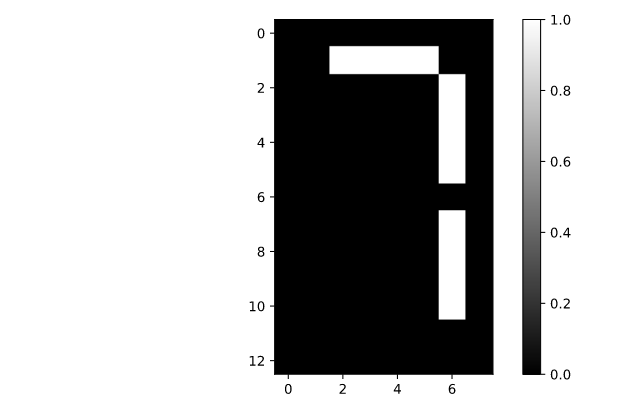

### NMF learns the parts of images
Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

Import NMF from sklearn.decomposition.
Create an NMF instance called model with 7 components. (7 is the number of cells in an LED display).
Apply the .fit_transform() method of model to samples. Assign the result to features.
To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.
Assign the row 0 of features to digit_features.
Print digit_features.

In [ ]:
# Import NMF
from sklearn.decomposition import NMF
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
     show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

Import PCA from sklearn.decomposition.
Create a PCA instance called model with 7 components.
Apply the .fit_transform() method of model to samples. Assign the result to features.
To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

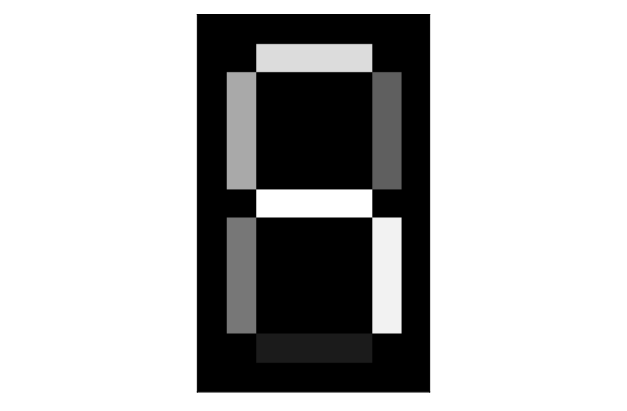

#### Which articles are similar to 'Cristiano Ronaldo'?
In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

Import normalize from sklearn.preprocessing.
Apply the normalize() function to nmf_features. Store the result as norm_features.
Create a DataFrame df from norm_features, using titles as an index.
Use the .loc[] accessor of df to select the row of 'Cristiano Ronaldo'. Assign the result to article.
Apply the .dot() method of df to article to calculate the cosine similarity of every row with article.
Print the result of the .nlargest() method of similarities to display the most similiar articles. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df =pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

## Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose column correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

Import:
NMF from sklearn.decomposition.
Normalizer and MaxAbsScaler from sklearn.preprocessing.
make_pipeline from sklearn.pipeline.
Create an instance of MaxAbsScaler called scaler.
Create an NMF instance with 20 components called nmf.
Create an instance of Normalizer called normalizer.
Create a pipeline called pipeline that chains together scaler, nmf, and normalizer.
Apply the .fit_transform() method of pipeline to artists. Assign the result to norm_features.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.pipeline import  make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features =pipeline.fit_transform(artists) 


### Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

Import pandas as pd.
Create a DataFrame df from norm_features, using artist_names as an index.
Use the .loc[] accessor of df to select the row of 'Bruce Springsteen'. Assign the result to artist.
Apply the .dot() method of df to artist to calculate the dot product of every row with artist. Save the result as similarities.
Print the result of the .nlargest() method of similarities to display the artists most similar to 'Bruce Springsteen'.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities =df.dot(artist) 
# Display those with highest cosine similarity
print(similarities.nlargest())
## solution
    #Bruce Springsteen    1.000000
   # Neil Young           0.955896
    #Van Morrison         0.872452
   # Leonard Cohen        0.864763
    #Bob Dylan            0.859047
   # dtype: float64

